# ****Midterm of Tomáš Šamaj (36902772)****

In [154]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import datetime
import zipfile

PART 1

access the data

In [155]:
ADP = pd.read_csv(".\ADP.csv")
EIX = pd.read_csv(".\EIX.csv")
FDS = pd.read_csv(".\FDS.csv")
IPG = pd.read_csv(".\IPG.csv")
ticker_list = [ADP,EIX,FDS,IPG]

#set index to datetime
for ticker in ticker_list:
 ticker.set_index(["Date"],inplace = True)

ADP

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,112.059998,110.550003,110.980003,111.529999,3716200.0,100.551643
2017-11-14,112.230003,110.940002,111.309998,112.080002,1992000.0,101.047508
2017-11-15,112.230003,110.379997,112.199997,110.660004,1555200.0,99.767288
2017-11-16,111.480003,110.470001,111.000000,111.029999,1870200.0,100.100868
2017-11-17,111.220001,110.269997,110.980003,111.059998,1969500.0,100.127922
...,...,...,...,...,...,...
2022-11-07,241.229996,236.320007,238.520004,240.410004,1250400.0,240.410004
2022-11-08,248.449997,240.119995,240.940002,245.039993,1724200.0,245.039993
2022-11-09,245.600006,240.009995,243.649994,240.380005,1242900.0,240.380005


1) Is there a company that has no difference between the Close and Adj Close columns?
What does it mean from the financial point of view for the stock (you can get bonus
partial points)?

In [156]:
print(sum(ADP["Close"]==ADP["Adj Close"])==0)
print(sum(EIX["Close"]==EIX["Adj Close"])==0)
print(sum(FDS["Close"]==FDS["Adj Close"])==0)
print(sum(IPG["Close"]==IPG["Adj Close"])==0)


False
False
False
False


Since it is not true for any ticker, there is a difference between Close and Adj Close columns for all companies.

From the financial point of view this means that during the sample period, each of the 4 companies has at least once paid dividends/split stocks or issued new shares after trading hours. In such cases, the Adj. Close price is different from the Close price of the day.

2) What is the highest and lowest price (Adj Close) each company recorded?

In [157]:
for ticker in ticker_list:
    print(ticker["Adj Close"].max(),ticker["Adj Close"].min())

259.8173217773437 98.1278076171875
72.75 40.61245727539063
487.8295593261719 178.72164916992188
39.13483428955078 11.541755676269531


ADP: max=259.8173217773437, min=98.1278076171875
EIX: max=72.75, min=40.61245727539063
FDS: max=487.8295593261719, min=178.72164916992188
IPG: max=39.13483428955078, min=11.541755676269531

3) Calculate logarithmic returns from Adj Close. For each company report on
its, min, max, mean, median of the return distribution.

In [158]:
ADP_returns = np.log(ADP["Adj Close"]/ADP["Adj Close"].shift(1))
EIX_returns = np.log(EIX["Adj Close"]/EIX["Adj Close"].shift(1))
FDS_returns = np.log(FDS["Adj Close"]/FDS["Adj Close"].shift(1))
IPG_returns = np.log(IPG["Adj Close"]/IPG["Adj Close"].shift(1))

print("ADP")
print(ADP_returns.describe())
print("EIX")
print(EIX_returns.describe())
print("FDS")
print(FDS_returns.describe())
print("IPG")
print(IPG_returns.describe())

ADP
count    1258.000000
mean        0.000722
std         0.017758
min        -0.165495
25%        -0.006691
50%         0.001459
75%         0.009388
max         0.111573
Name: Adj Close, dtype: float64
EIX
count    1258.000000
mean       -0.000102
std         0.020523
min        -0.143101
25%        -0.008925
50%         0.000598
75%         0.009729
max         0.143101
Name: Adj Close, dtype: float64
FDS
count    1258.000000
mean        0.000645
std         0.018399
min        -0.117682
25%        -0.007156
50%         0.001863
75%         0.009211
max         0.140840
Name: Adj Close, dtype: float64
IPG
count    1258.000000
mean        0.000585
std         0.022848
min        -0.165692
25%        -0.010357
50%         0.000953
75%         0.011512
max         0.136922
Name: Adj Close, dtype: float64


4) When did each company record the highest gain and highest loss for the day?
(logarithmic loss). Hint: idxmax

In [159]:
print("HIGHEST GAINS:")
print("ADP")
print(ADP_returns.idxmax())
print("EIX")
print(EIX_returns.idxmax())
print("FDS")
print(FDS_returns.idxmax())
print("IPG")
print(IPG_returns.idxmax())

HIGHEST GAINS:
ADP
2020-03-26
EIX
2018-11-16
FDS
2020-06-25
IPG
2020-03-24


In [160]:
print("HIGHEST LOSSES:")
print("ADP")
print(ADP_returns.idxmin())
print("EIX")
print(EIX_returns.idxmin())
print("FDS")
print(FDS_returns.idxmin())
print("IPG")
print(IPG_returns.idxmin())

HIGHEST LOSSES:
ADP
2020-03-16
EIX
2020-03-16
FDS
2020-03-18
IPG
2020-03-12


5) What is the average calendar weekly volume for each company? Hint: check how to
resample pandas DF

In [161]:
ADP.index = pd.to_datetime(ADP.index)
ADP_res = ADP.resample("W").sum() #Sum the daily volumes to get weekly
print("ADP")
print(ADP_res["Volume"].mean())

EIX.index = pd.to_datetime(EIX.index)
EIX_res = EIX.resample("W").sum() #Sum the daily volumes to get weekly
print("EIX")
print(EIX_res["Volume"].mean())

FDS.index = pd.to_datetime(FDS.index)
FDS_res = FDS.resample("W").sum() #Sum the daily volumes to get weekly
print("FDS")
print(FDS_res["Volume"].mean())

IPG.index = pd.to_datetime(IPG.index)
IPG_res = IPG.resample("W").sum() #Sum the daily volumes to get weekly
print("IPG")
print(IPG_res["Volume"].mean())


ADP
9543471.647509579
EIX
11305770.881226053
FDS
1395741.3793103448
IPG
19628102.681992337


Here we can see the average weekly volume for each company

6) Which company recorded the highest total return over the whole period?

In [162]:
ADP_tot = np.log(ADP["Adj Close"][-1]/ADP["Adj Close"][0])
print("ADP")
print(ADP_tot)

EIX_tot = np.log(EIX["Adj Close"][-1]/EIX["Adj Close"][0])
print("EIX")
print(EIX_tot)

FDS_tot = np.log(FDS["Adj Close"][-1]/FDS["Adj Close"][0])
print("FDS")
print(FDS_tot)

IPG_tot = np.log(IPG["Adj Close"][-1]/IPG["Adj Close"][0])
print("IPG")
print(IPG_tot)

print(max(ADP_tot,EIX_tot,FDS_tot,IPG_tot))

ADP
0.9077046878477927
EIX
-0.12888781272445232
FDS
0.8113694502214714
IPG
0.7355804325398948
0.9077046878477927


Thus, ADP has recorded the highest total return over the whole period.

7) Plot the log-returns of the companies (ideally in the same plot)

<AxesSubplot: xlabel='Date'>

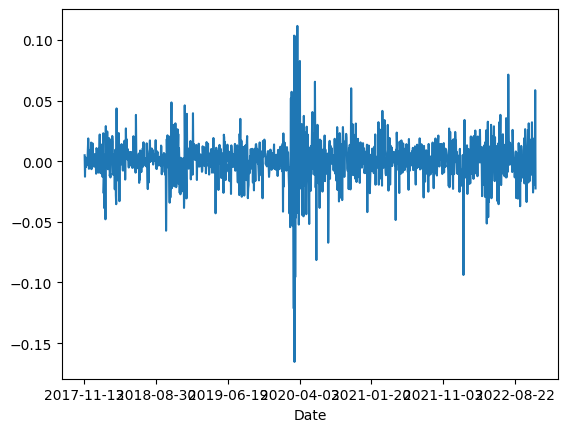

In [163]:
ADP_returns.plot()

<AxesSubplot: xlabel='Date'>

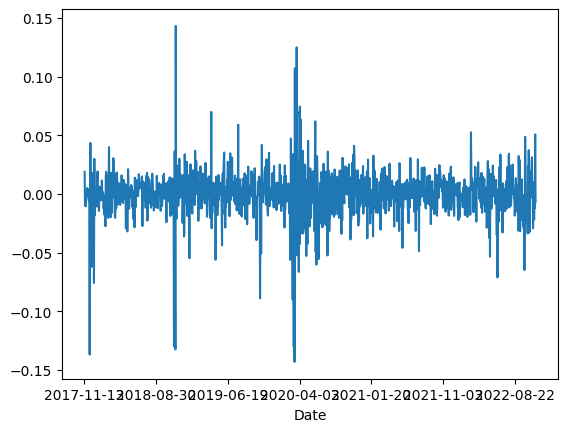

In [164]:
EIX_returns.plot()


<AxesSubplot: xlabel='Date'>

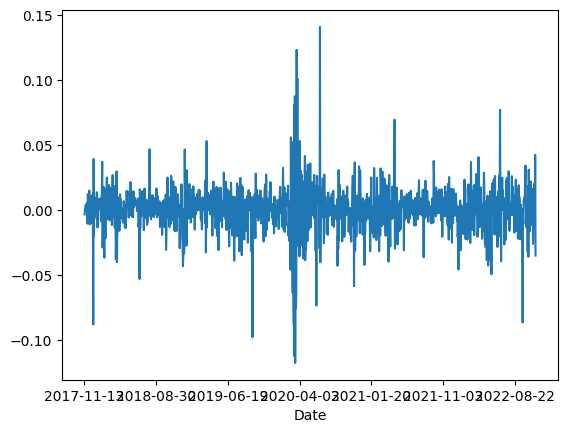

In [165]:
FDS_returns.plot()

<AxesSubplot: xlabel='Date'>

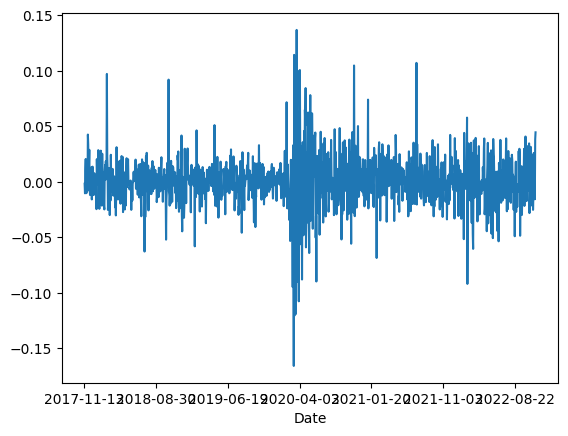

In [166]:
IPG_returns.plot()

8) Show the log-return distribution of the companies’ returns (ideally in the same plot
with each company having separate line). Choose appropriate type of visualization.

PART 2

Access data

In [167]:
SP500 = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
print(SP500.head())

  Symbol     Security  GICS_Sector                       hq    included  \
0    MMM           3M  Industrials    Saint Paul, Minnesota  09.08.1976   
1    AOS  A. O. Smith  Industrials     Milwaukee, Wisconsin  26.07.2017   
2    ABT       Abbott  Health Care  North Chicago, Illinois  31.03.1964   
3   ABBV       AbbVie  Health Care  North Chicago, Illinois  31.12.2012   
4   ABMD      Abiomed  Health Care   Danvers, Massachusetts  31.05.2018   

       Founded  
0         1902  
1         1916  
2         1888  
3  2013 (1888)  
4         1981  


1)Find out how many companies do not filled-in the date of inclusion (column
“included”) to S&P 500.

In [168]:
sum(SP500["included"].isna())

45

45 companies did not fill in the date of inclusion

2) Delete the companies with no inclusion date and calculate which company is the
oldest/youngest constituent and tell us the average age of a constituent in the sample.
If you need to fix anything or make any assumptions, comment on them in the code.
Hint: pd.to_datetime (some date column, dayfirst=True,errors='coerce')

3) Describe the distribution of companies across sectors and create a plot that
demonstrates the proportionality of the sectors (i.e. pie plot, or something like this)

<AxesSubplot: >

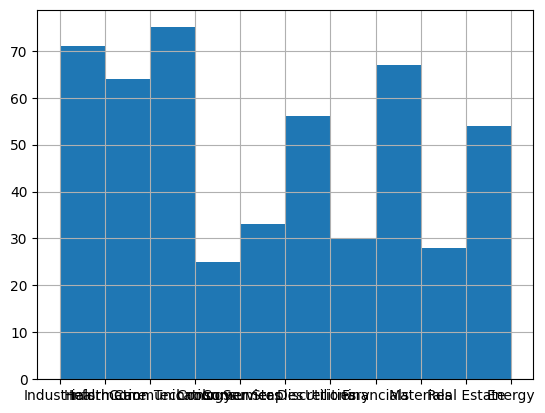

In [169]:
SP500["GICS_Sector"].hist()

In [170]:
SP500["GICS_Sector"].describe()

count                        503
unique                        11
top       Information Technology
freq                          75
Name: GICS_Sector, dtype: object

Unfortunately i dont have time to improve the histogram, but the top is Information Technology.

4) Parse the “hq” column, extract the state of the hq and describe the distribution of the
states. The column 'hq' contains the information about the city and the state in the
form: "city, state". Handle any potential issues.

5Join the dataset with this one